In [16]:
from tkinter import *
from tkinter import ttk, messagebox
from tkinter.filedialog import askopenfilename
from PIL import ImageTk, Image, ImageGrab


class Point:
    def __init__(self, x=0.0, y=0.0):
        self.x = x
        self.y = y

class Polygon:
    def __init__(self, points=[]):
        self.points = points
        self.area_px = None
        self.area_m = None
        
    def get_point(self,ponto=Point()):
        self.points.append(ponto)
        print(f'{ponto.x}, {ponto.y}')

    def reset_points(self):
        self.points = []

class Imagem:
    def __init__(self):
        self.file = None
        self.img = None
        self.src_img = None

class Dimension:
    def __init__(self, points=[]):
        self.points = points
        self.length = None
        self.px_length = None
    
    def reset_points(self):
        self.points = []

    def set_length(self,length):
        self.length = length

class Area:
    def __init__(self):
        self.area_px_plan = None
        self.area_px_proj = None
        self.area_ratio_px_proj_px_plan = None
        self.area_m_proj = None
        self.area_ratio_m_proj_px_proj = None

class FreeDraw:
    def __init__(self, points=[]):
        self.points = points
        self.area_px = None
        self.area_m = None

    def get_point(self,ponto=Point()):   
        self.points.append(ponto)

    def reset_points(self):
        self.points = []
    
    def closing_points_free_draw(self):
        
        if len(self.points)>1:
            final_point = self.points[-1]
            initial_point = self.points[0]

            delta_x = initial_point.x - final_point.x
            delta_y = initial_point.y - final_point.y

            x_dir = 1 if delta_x > 0 else -1 if delta_x < 0 else 0
            
            y_dir = 1 if delta_y > 0 else -1 if delta_y < 0 else 0
            
            points_list = []

            for i in range(1,abs(delta_x)+1):
                ponto = Point(final_point.x+i*x_dir,final_point.y)
                points_list.append(ponto)
            for j in range(1,abs(delta_y)):
                ponto = Point(initial_point.x,final_point.y+j*y_dir)
                points_list.append(ponto)
            
            for k in points_list:
                self.get_point(k)
   
class App:
    def __init__(self):

        self.root = Tk()
        self.root.geometry("1000x500")

        self.imagem = Imagem()

        self.freeDraw = FreeDraw()

        self.polygon = Polygon()

        self.area = Area()

        self.dimensionRatio_1 = Dimension()

        self.dimensionRatio_2 = Dimension()

        self.freeDrawCanvas = None
        

        # Cria o menu para carregar as imagens
        self.menubar = Menu(self.root)
        self.root.config(menu=self.menubar,padx=1,pady=1)
        self.file_menu = Menu(self.menubar,tearoff=False)
        self.menubar.add_cascade(label="File", menu=self.file_menu)
        self.file_menu.add_command(label="Open", command=lambda: self.open_image())
        self.file_menu.add_command(label="Exit", command=lambda: self.root.quit())

        # FRAMES

        # Cria o frame geral
        self.frame = Frame(self.root)

        # Frame para Botões dos tipos de desenho

        self.frame_buttons = Frame(self.root,relief=RAISED,borderwidth=3)
        self.frame_buttons.pack(side=RIGHT,fill=Y,expand=False)

        # self.frame.pack(side=RIGHT,fill=BOTH)

        # Frame e componentes para a definição do tamanho da imagem e da razão mm/pixel

        self.frame_img_prop = Frame(self.root,relief=GROOVE,borderwidth=2,width=135)
        self.frame_img_prop.pack(side=LEFT,fill=Y,expand=False)

        self.frame_zoom = Frame(self.frame_img_prop,relief=RIDGE,borderwidth=1)

        # FRAME INPUT
        self.frame_input = Frame(self.frame_img_prop,relief=RIDGE,borderwidth=1)

        #FRAME INPUT LABLE
        self.frame_input_lable = Frame(self.frame_input)

        #FRAME INPUT, LENGTH 1 LED
        self.frame_input_led_1 = Frame(self.frame_input)

        #FRAME INPUT, LENGTH 2 LED
        self.frame_input_led_2 = Frame(self.frame_input)

        # FRAME INPUT BUTTON
        self.frame_input_button = Frame(self.frame_input)

        # # SLIDERS
        # self.slider_lable = ttk.Label(self.frame_zoom,text='Zoom',wraplength=90)
        # self.slider = ttk.Scale(self.frame_zoom,from_=1, to=100, orient='horizontal', command = lambda event: self.render_image(),length=125)
        # self.slider.set(30)

        ### INPUTS, LABEL and LEDS
        self.dimension_input_lable = ttk.Label(self.frame_input_lable,text='Comprimentos conhecidos em mm',wraplength=150)

        # LENGTH 1
        self.green_led_figure_1 = ImageTk.PhotoImage(Image.open('images/small_green_led.jpg'))
        self.red_led_figure_1 = ImageTk.PhotoImage(Image.open('images/small_red_led.jpg'))
        self.led_1 = ttk.Label(self.frame_input_led_1, image=self.red_led_figure_1 )
        self.C1_button = ttk.Button(self.frame_input_led_1, text='C1', width=4, command= lambda: self.C1_button_pressed())
        
        # LENGTH 2
        self.green_led_figure_2 = ImageTk.PhotoImage(Image.open('images/small_green_led.jpg'))
        self.red_led_figure_2 = ImageTk.PhotoImage(Image.open('images/small_red_led.jpg'))
        self.led_2 = ttk.Label(self.frame_input_led_2, image=self.red_led_figure_2)
        self.C2_button = ttk.Button(self.frame_input_led_2, text='C2', width=4, command= lambda: self.C2_button_pressed())
        
        # SLIDERS
        self.slider_lable = ttk.Label(self.frame_zoom,text='Zoom',wraplength=90)
        self.slider = ttk.Scale(self.frame_zoom,from_=1, to=100, orient='horizontal', command = lambda event: [self.render_image(), self.led_1.config(image=self.red_led_figure_1),self.led_2.config(image=self.red_led_figure_2)],length=125)
        self.slider.set(30)
        
        self.input_value_1 = StringVar(self.root)
        self.dimension_input_1 = Entry(self.frame_input_led_1,textvariable=self.input_value_1, bd=3,width=15)
        
        self.input_value_2 = StringVar(self.root)
        self.dimension_input_2 = Entry(self.frame_input_led_2,textvariable=self.input_value_2, bd=3,width=15)
        

        self.button_set_dimension = ttk.Button(
            self.frame_input_button,text='Selecionar pontos do\ncomprimento',
            command= lambda: self.C1_button_pressed()
        )
        
        # Action box
        self.action_box = Message(self.frame_img_prop,text='- Carregue uma imagem\n\n- Ajuste o zoom\n\n- Digite os valores dos comprimentos conhecidos\n\n- Aperte C1 para definir os pontos do comprimento 1\n\n- Aperte C2 para definir os pontos do comprimento 2\n\n- Quando os dois leds ficarem verdes, aperte em desenho livre',bg='light yellow', anchor='nw',justify=LEFT, width=150)
        
    
        #Positioning
        self.frame_zoom.pack(side=TOP,fill=BOTH)
        self.frame_input.pack(side=TOP,fill=BOTH)
        self.action_box.pack(side=TOP, fill=BOTH,expand=True)
        self.frame_input_lable.pack(side=TOP)
        self.frame_input_led_1.pack(side = TOP)
        self.frame_input_led_2.pack(side=TOP,pady=5)
        self.frame_input_button.pack(side=TOP)

        self.slider_lable.pack(side=LEFT,anchor='w',pady=15)
        self.slider.pack(side=LEFT,anchor='n',padx=1,pady=15)

        self.C1_button.pack(side=LEFT,padx=2)
        self.C2_button.pack(side=LEFT,padx=2)

        self.dimension_input_lable.pack(side=TOP,pady=10)
        self.dimension_input_1.pack(side=LEFT)
        self.dimension_input_2.pack(side=LEFT)

        self.led_1.pack(side=RIGHT,anchor='ne')
        self.led_2.pack(side=RIGHT,anchor='ne')
    
        # Canvas
        self.canvas = Canvas(self.frame)

        
        self.button_free_draw = ttk.Button(self.frame_buttons, text ='Desenho Livre', command = self.check_free_draw)

        self.button_polygon = ttk.Button(self.frame_buttons, text ='Polígono', command = self.check_polygon)

        # BOTÕES de tipo de desenho
        self.button_free_draw.pack(side=TOP,pady=25,padx=5)
        self.button_polygon.pack(side=TOP,pady=25)

        #FRAME CENTRAL
        self.frame = Frame(self.root,relief=RIDGE,border=1)

        self.frame.pack(side=TOP,anchor='n',fill=BOTH, expand=True)
        
    def check_polygon(self):
        self.root.focus()
        if self.area.area_ratio_m_proj_px_proj:
            self.render_image()
            self.action_box.config(text='-Clique para selecionar os pontos que delimitam a lesão.\n\n- Aperte espaço para finalizar o polígono.',justify=LEFT)
            self.polygon.reset_points()
            self.root.bind('<Button-1>',self.create_polygon)
            self.root.bind('<space>',lambda event: self.close_polygon())
            # self.root.bind('<space>',lambda event: self.close_polygon())
        else:
            self.root.unbind('<Button-1>')
            messagebox.showerror('','Você precisa definir o comprimento conhecido')
    
    def create_polygon(self,event):
        ponto = Point(event.x,event.y)
        self.polygon.get_point(ponto)
        self.canvas.create_oval((ponto.x,ponto.y,ponto.x,ponto.y),fill='black',width=2)
        if len(self.polygon.points)>1:
            self.canvas.create_line(self.polygon.points[-2].x, self.polygon.points[-2].y, self.polygon.points[-1].x, self.polygon.points[-1].y)

    def close_polygon(self):
        if len(self.polygon.points)>=3:
            self.unbind_all()
            points_list = [(point.x,point.y) for point in self.polygon.points]
            points_list.append((self.polygon.points[0].x, self.polygon.points[0].y))
            self.canvas.create_line(points_list)
            self.calcula_area_polygon()
        else:
            self.unbind_all()
            self.polygon.reset_points()
            self.render_image()


    def check_free_draw(self):
        self.root.focus()
        if self.area.area_ratio_m_proj_px_proj:
            self.render_image()
            self.action_box.config(text='Clique duas vezes para começar o desenho e, chegando perto do final do desenho, clique novamente duas vezes')
            self.freeDraw.reset_points()
            self.root.bind('<Double-Button>', lambda event: [self.root.bind('<Motion>',self.free_draw), self.root.bind('<Double-Button>', lambda event: [self.root.unbind('<Motion>'),self.freeDraw.closing_points_free_draw(),self.close_free_draw(),self.calcula_area_freeDraw()]) ])
        else:
            self.root.unbind('<Motion>')
            messagebox.showerror('','Você precisa definir o comprimento conhecido')
    
    def free_draw(self,event):
        if self.area.area_ratio_m_proj_px_proj:
            # self.root.bind('<Double-Button>', lambda event: [self.root.unbind('<Motion>'),self.freeDraw.closing_points_free_draw(),self.close_free_draw(),self.calcula_area_geom()]) 
            x, y = event.x, event.y
            ponto = Point(x,y)
            print(x,y)
            self.freeDraw.get_point(ponto)
            if len(self.freeDraw.points)>1:
                self.canvas.create_line(self.freeDraw.points[-2].x, self.freeDraw.points[-2].y, self.freeDraw.points[-1].x, self.freeDraw.points[-1].y)
        else:
            self.root.unbind('<Motion>')
            messagebox.showerror('','Você precisa definir os comprimentos conhecidos')

    
    def set_proj_plan_ratio(self):
        P1 = self.dimensionRatio_1.points[0]
        P2 = self.dimensionRatio_1.points[1]
        P3 = self.dimensionRatio_2.points[0]
        P4 = self.dimensionRatio_2.points[1]
 
        # Definir os pontos com máximo delta_x e delta_y entre P0 e os outros pontos 
                
        vetor_1 = Point(P2.x - P1.x, P2.y - P1.y)

        vetor_2 = Point(P4.x - P3.x, P4.y - P3.y)

        self.area.area_px_plan = ((vetor_1.x*vetor_2.y) ** 2 + (vetor_2.x*vetor_1.y) ** 2) ** 0.5

        self.area.area_px_proj = (vetor_1.x**2 + vetor_1.y**2)**0.5 * (vetor_2.x**2 + vetor_2.y**2)**0.5

        self.area.area_ratio_px_proj_px_plan = self.area.area_px_proj / self.area.area_px_plan

        length_1 = self.dimensionRatio_1.length 

        length_2 = self.dimensionRatio_2.length 

        # print(f'O comprimento 1 é de {length_1} e o comprimento 2 de {length_2}')

        self.area.area_m_proj = length_1 * length_2 

        self.area.area_ratio_m_proj_px_proj = length_1 * length_2 / self.area.area_px_proj

    def C1_button_pressed(self):
        if self.input_value_1.get():
            self.render_image() #Caso já tenha algo desenhado, uma nova imagem é renderizada ao apertar o botão
            self.action_box.config(text='- Selecione os pontos do comprimento conhecido')
            self.dimensionRatio_1.reset_points()
            self.dimensionRatio_1.set_length(float(self.input_value_1.get()))
            self.root.bind('<Button-1>', lambda event: self.get_C1_points(event))
            
        else:
            messagebox.showerror('','Você precisa digitar o comprimento conhecido')
            
        
    def get_C1_points(self, event):   
        ponto=Point(event.x,event.y)
        
        if len(self.dimensionRatio_1.points)<=1:
            self.dimensionRatio_1.points.append(ponto)
            self.canvas.create_oval((event.x,event.y,event.x,event.y),fill='black',width=5)
        
        if len(self.dimensionRatio_1.points) == 2:
            self.led_1.config(image=self.green_led_figure_1)
            self.root.unbind('<Button-1>')
            self.root.focus()

        if len(self.dimensionRatio_1.points) == 2 and len(self.dimensionRatio_2.points) == 2:
            self.set_proj_plan_ratio()

    def C2_button_pressed(self):
        if self.input_value_2.get():
            self.render_image() #Caso já tenha algo desenhado, uma nova imagem é renderizada ao apertar o botão
            self.action_box.config(text='- Selecione os pontos do comprimento conhecido')
            self.dimensionRatio_2.reset_points()
            self.dimensionRatio_2.set_length(float(self.input_value_2.get()))
            self.root.bind('<Button-1>', lambda event: self.get_C2_points(event))
            
        else:
            messagebox.showerror('','Você precisa digitar o comprimento conhecido')
            
        
    def get_C2_points(self, event):   
        ponto=Point(event.x,event.y)
        
        if len(self.dimensionRatio_2.points)<=1:
            self.dimensionRatio_2.points.append(ponto)
            self.canvas.create_oval((event.x,event.y,event.x,event.y),fill='black',width=5)
        
        if len(self.dimensionRatio_2.points) == 2:
            self.led_2.config(image=self.green_led_figure_2)
            self.root.unbind('<Button-1>')
            self.root.focus()

        if len(self.dimensionRatio_1.points) == 2 and len(self.dimensionRatio_2.points) == 2:
            self.set_proj_plan_ratio()


    def open_image(self):
        self.imagem.file = askopenfilename(filetypes=[("all files","*"),("Bitmap Files","*.bmp; *.dib"), ("JPEG", "*.jpg; *.jpe; *.jpeg; *.jfif"),("PNG", "*.png"), ("TIFF", "*.tiff; *.tif")])
        
        self.imagem.src_img = Image.open(self.imagem.file)

        self.render_image()

    def render_image(self):
        if self.imagem.src_img:

            picture=self.imagem.src_img

            picture_w, picture_h = picture.size

            picture_w_resized, picture_h_resized = int(picture_w * self.slider.get()/100), int(picture_h * self.slider.get()/100) 

            self.imagem.img = ImageTk.PhotoImage(picture.resize((picture_w_resized, picture_h_resized),resample=Image.LANCZOS))

            # self.frame.destroy()
            
            # self.frame = Frame(self.root,width=picture_w_resized,height=picture_h_resized)

            # self.frame.pack(side=TOP,anchor='n', padx = 50,fill=BOTH, expand=True)
            
            self.canvas.destroy()
                   
            self.canvas = Canvas(self.frame, width=picture_w_resized, height=picture_h_resized)

            self.canvas.create_image(0, 0, anchor=NW, image=self.imagem.img)
            
            self.canvas.pack(side=TOP, anchor='n')

        else:
            pass
        

    def calcula_area_freeDraw(self):
        if len(self.freeDraw.points)>2 and self.area.area_ratio_m_proj_px_proj:

            areas_px=[]

            for i,_ in enumerate(self.freeDraw.points):
                delta_x_px = self.freeDraw.points[i].x - self.freeDraw.points[i-1].x
                delta_y_px = self.freeDraw.points[i].y - self.freeDraw.points[i-1].y
                y_1_px = min(self.freeDraw.points[i].y ,self.freeDraw.points[i-1].y)
                area = delta_x_px * (y_1_px + abs(delta_y_px)/2)

                areas_px.append(area)
            
            self.freeDraw.area_px = abs(sum(areas_px))
            
            area_meters = self.freeDraw.area_px * self.area.area_ratio_px_proj_px_plan * self.area.area_ratio_m_proj_px_proj
            self.freeDraw.area_m = area_meters
            
            self.action_box.config(text=f'A área da figura é {area_meters:.2f} mm²')
            # print(f'Calcula area geom foi chamado, o ponto inicial é {self.freeDraw.points[0].x},{self.freeDraw.points[0].y} e o ponto Final é {self.freeDraw.points[-1].x},{self.freeDraw.points[-1].y} ')
    
    def calcula_area_polygon(self):
        if len(self.polygon.points)>2 and self.area.area_ratio_m_proj_px_proj:

            areas_px=[]

            for i,_ in enumerate(self.polygon.points):
                delta_x_px = self.polygon.points[i].x - self.polygon.points[i-1].x
                delta_y_px = self.polygon.points[i].y - self.polygon.points[i-1].y
                y_1_px = min(self.polygon.points[i].y ,self.polygon.points[i-1].y)
                area = delta_x_px * (y_1_px + abs(delta_y_px)/2)
                areas_px.append(area)
            
            self.polygon.area_px = abs(sum(areas_px))
            
            area_meters = self.polygon.area_px * self.area.area_ratio_px_proj_px_plan * self.area.area_ratio_m_proj_px_proj
            self.polygon.area_m = area_meters
            
            self.action_box.config(text=f'A área da figura é {area_meters:.2f} mm²')
            # print(f'Calcula area geom foi chamado, o ponto inicial é {self.freeDraw.points[0].x},{self.freeDraw.points[0].y} e o ponto Final é {self.freeDraw.points[-1].x},{self.freeDraw.points[-1].y} ')
    
    def unbind_all(self):
        self.root.unbind('<Button-1>')
        self.root.unbind('<Double-Button>')
        self.root.unbind('<Motion>')
        self.root.unbind('<space>')
        # self.root.unbind('<KeyPress>')

# print('Raza pixel proj pixel plan',myApp.area.area_ratio_px_proj_px_plan)

# print('\n Razao m proj pixel proj', myApp.area.area_ratio_m_proj_px_proj)

    def close_free_draw(self):
        self.unbind_all()
        points_list = [(point.x,point.y) for point in self.freeDraw.points]
        points_list.append((self.freeDraw.points[0].x,self.freeDraw.points[0].y))
        self.canvas.create_line(points_list)
        self.tira_print()
   
   
    def tira_print(self):

    
        # x=self.root.winfo_rootx()+self.frame.winfo_x()
        # y=self.root.winfo_rooty()+self.frame.winfo_y()
        # x1=x+self.frame.winfo_width() 
        # y1=y+self.frame.winfo_height()~

        # x = self.root.winfo_rootx() + self.frame_img_prop.winfo_width()
        # y = self.root.winfo_rooty() 
        # x1 = x + self.frame.winfo_width() 
        # y1 = y + self.frame.winfo_height()
        
        # x0 = self.root.winfo_x()+self.frame_img_prop.winfo_width()+self.frame.winfo_x() 
        # y = self.root.winfo_y() 
        print('root',self.root.winfo_x(),self.root.winfo_rootx(), self.root.winfo_screenwidth(),self.root.winfo_width())
        print('frame_img_prop', self.frame_img_prop.winfo_x(),self.frame_img_prop.winfo_rootx())
        print('frame',self.frame.winfo_x(),self.frame.winfo_rootx())
        print('canvas', self.canvas.winfo_x(), self.canvas.winfo_rootx())
        
        x0 = self.canvas.winfo_rootx() 
        # x0 = self.frame_img_prop.winfo_rootx() + (self.root.winfo_rootx()-self.root.winfo_x()) + self.frame.winfo_rootx() 
        # x0 = self.frame.winfo_rootx() + self.frame.winfo_x()
        y0 = self.canvas.winfo_rooty()
        
        x1 = x0 + self.canvas.winfo_width() 
        y1 = y0 +self.canvas.winfo_height()

        print(f'{x0};{y0}', f'{x1};{y1}')
      
        

        HWND = self.frame.winfo_id()  # get the handle of the canvas

        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas

        self.freeDrawCanvas = ImageGrab.grab(rect)  # get image of the current location

        # self.freeDrawCanvas = ImageGrab.grab(bbox=(x0,y0,x1,y1))
        # self.freeDrawCanvas = ImageGrab.grab().crop((x0,y0,x1,y1))

myApp = App()

myApp.root.mainloop()

myApp.freeDrawCanvas

C:\Users\andreprovensi\AppData\Local\Temp\ipykernel_13720\3676353808.py:388: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  self.imagem.img = ImageTk.PhotoImage(picture.resize((picture_w_resized, picture_h_resized),resample=Image.LANCZOS))


245 40
248 40
249 40
251 39
255 38
259 37
264 36
268 36
273 36
277 35
282 34
287 34
289 34
292 34
296 32
300 32
304 32
307 31
309 31
311 31
314 31
318 31
322 31
323 31
324 31
325 31
328 31
329 31
332 31
336 31
340 30
344 30
350 30
355 30
359 29
365 29
370 29
376 28
380 28
385 28
390 26
395 26
400 26
402 26
405 26
409 26
413 26
418 26
422 26
425 26
428 26
432 26
434 26
438 26
441 26
445 28
450 31
450 32
452 33
454 34
456 35
458 36
459 36
460 37
461 39
462 39
464 41
466 44
471 48
473 51
476 55
479 59
479 62
480 63
480 64
482 66
482 69
482 71
482 75
483 77
485 80
485 84
485 87
485 91
485 92
485 95
485 97
484 99
484 100
483 102
482 102
481 102
480 102
478 102
477 102
476 102
473 102
471 102
469 102
468 102
466 102
464 99
459 98
459 97
458 97
454 94
453 93
450 92
445 90
441 88
439 88
434 86
432 85
428 85
424 84
421 83
419 83
416 83
413 82
411 82
407 82
405 82
404 82
403 82
401 82
400 82
397 82
396 82
395 82
394 83
393 83
391 84
390 84
387 87
387 88
386 88
383 90
383 91
381 93
380 94
378 96


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\andreprovensi\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\andreprovensi\AppData\Local\Temp\ipykernel_13720\3676353808.py", line 270, in <lambda>
    self.root.bind('<Double-Button>', lambda event: [self.root.bind('<Motion>',self.free_draw), self.root.bind('<Double-Button>', lambda event: [self.root.unbind('<Motion>'),self.freeDraw.closing_points_free_draw(),self.close_free_draw(),self.calcula_area_freeDraw()]) ])
  File "C:\Users\andreprovensi\AppData\Local\Temp\ipykernel_13720\3676353808.py", line 465, in close_free_draw
    self.tira_print()
  File "C:\Users\andreprovensi\AppData\Local\Temp\ipykernel_13720\3676353808.py", line 502, in tira_print
    rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
NameError: name 'win32gui' is not defined


In [17]:

print('Raza pixel proj pixel plan',myApp.area.area_ratio_px_proj_px_plan)

print('\n Razao m proj pixel proj', myApp.area.area_ratio_m_proj_px_proj)

Raza pixel proj pixel plan 1.3149446119953598

 Razao m proj pixel proj 0.009949469595078978


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x = [ponto.x for ponto in myApp.freeDraw.points]
y = [ponto.y for ponto in myApp.freeDraw.points]


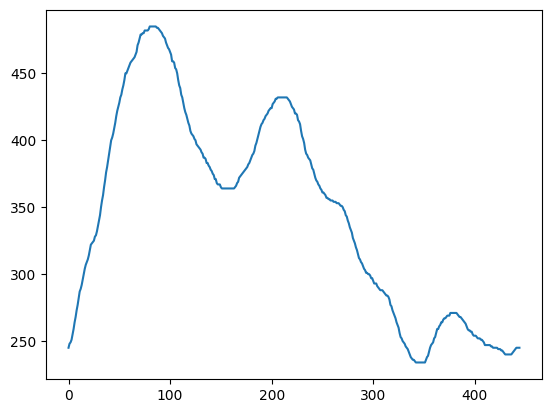

In [20]:
plt.plot(x)

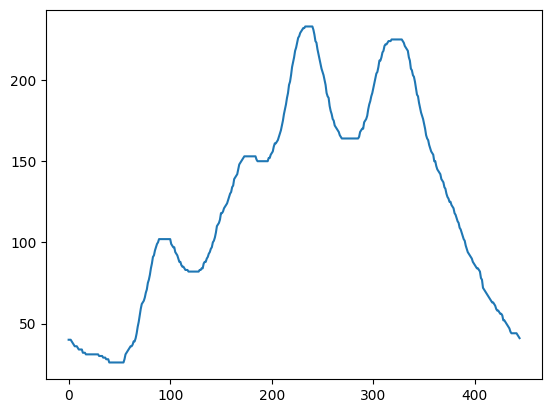

In [21]:
plt.plot(y)

In [22]:
# resized_image_RGB.getpixel((20,20))

In [23]:
# picture_RGB.getpixel((20,20))